In [39]:
## kuch gadbad ho gyi isme, kabhi aur dekhenge kya !

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
plt.style.use('seaborn')

# Data Preparation

In [27]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

#normal distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


# Data Visualise

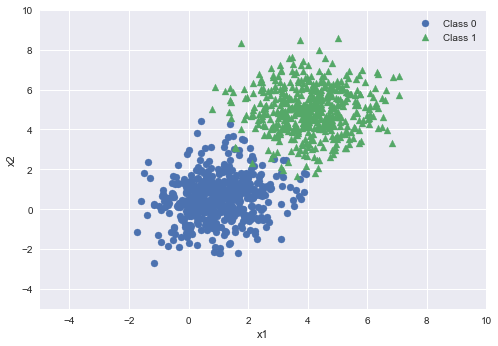

In [28]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],label='Class 1',marker='^')

plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Create training & test set

In [29]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [30]:
data[:500,:-1] = dist_01
data[500:,:-1] = dist_02
data[:500,-1] = 0
data[500:,-1] = 1

np.random.shuffle(data)
print(data[:10])

[[-0.5569343   0.7967277   0.        ]
 [ 1.52893155 -0.33260545  0.        ]
 [ 4.39079164  4.04157552  1.        ]
 [ 0.22586245 -0.30971266  0.        ]
 [ 1.55449812  3.14257369  1.        ]
 [ 2.01660756  1.292185    0.        ]
 [ 0.39954061  0.8394597   0.        ]
 [ 4.21281434  5.2097836   1.        ]
 [ 2.51390547  5.01299627  1.        ]
 [ 0.93193465  0.7453359   0.        ]]


In [32]:
def hypo(x,theta,b):
    return sigmoid(np.dot(x,theta) + b)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0 * z))

def error(y,x,theta,b):
    m = x.shape[0]
    e = 0.0
    for i in range(m):
        hx = hypo(x[i],theta,b)
        e += y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx)
        
    return -e/m
    
def get_grad(y,x,theta,b):
    m = x.shape[0]
    grad_theta = np.zeros(theta.shape)
    grad_b = 0.0
    for i in range(m):
        hx = hypo(x[i],theta,b)
        grad_theta += (y[i]-hx)*x[i]
        grad_b += (y[i]-hx)
    
    grad_theta /= m
    grad_b /= m
    return grad_theta,grad_b
        
        
def predict(x,w,b):
    
    confidence = hypo(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_test,theta,b,y_test):
        y_pred = []
        for i in range(x_test.shape[0]):
            p = predict(x_test[i],theta,b)
            y_pred.append(p)
        
        y_pred = np.array(y_pred)
    
        return float((y_pred==y_test).sum())/y_test.shape[0]
          
    
def grad_desc(x,y,b,theta,lr):
    itr = 0
    max_itr = 1000
    acc_list = [] 
    err_list = []
    e = error(y,x,theta,b)
    a = get_acc(x,theta,b,y)
    while(itr <= max_itr):
        grad_theta,grad_b = get_grad(y,x,theta,b)
        theta += lr*grad_theta
        b     += lr*grad_b
        err_list.append(e)
        e = error(y,x,theta,b)
        acc_list.append(a)
        a = get_acc(x,theta,b,y)
        itr += 1
    
    return theta,acc_list,err_list,b

# # One Iteration of Gradient Descent
# def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
#     err = error(y_true,x,w,b)
#     [grad_w,grad_b] = get_grad(y_true,x,w,b)
    
#     w = w + learning_rate*grad_w
#     b = b + learning_rate*grad_b
    
    
#     return err,w,b
        


In [36]:
theta = 2*np.random.random((X_train.shape[1]),)
b     = 5*np.random.random() 
theta,acc_list,err_list,b = grad_desc(X_train,Y_train,b,theta,lr=0.1)

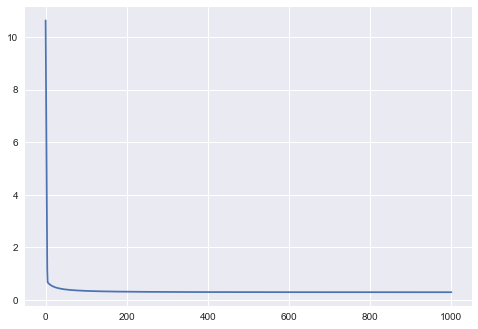

In [37]:
plt.plot(err_list)

42.265822784810126


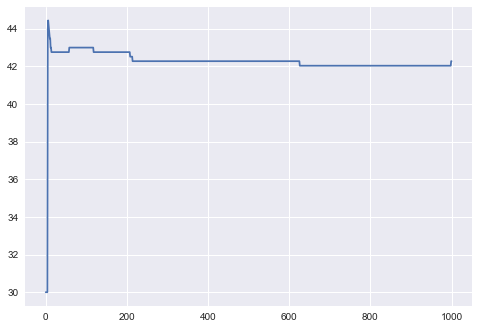

In [38]:
plt.plot(acc_list)
print(acc_list[-1])

## Decision Boundary

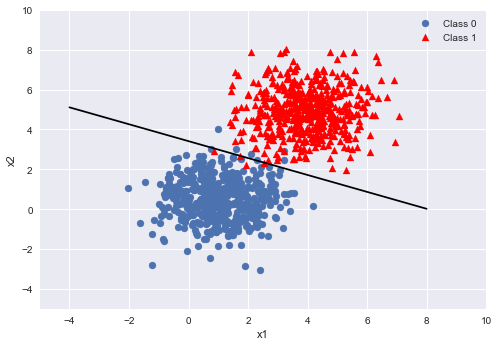

In [164]:
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(theta[0]*x + b)/theta[1]   #x2 is y basically
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [165]:
print(theta,b)

[0.58888127 1.3884362 ] -4.735912755345344
